In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, silhouette_score
# 엑셀 파일 경로
file_path = '/content/drive/MyDrive/StudentPerformanceFactors.csv'  # 실제 파일 경로로 수정
# 엑셀 파일 읽기
df = pd.read_csv(file_path)

# 데이터 출력
print("엑셀 파일 내용:")
print(df.head())

엑셀 파일 내용:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0     

In [36]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [37]:
numerical_columns = [
    'Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
    'Physical_Activity', 'Tutoring_Sessions', 'Exam_Score'
]
categorical_columns = [
    'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
    'School_Type', 'Peer_Influence', 'Learning_Disabilities',
    'Parental_Education_Level', 'Distance_from_Home', 'Gender'
]

In [38]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # 최신 버전 호환
encoded_categorical_data = pd.DataFrame(
    encoder.fit_transform(df[categorical_columns]),
    columns=encoder.get_feature_names_out(categorical_columns)
)

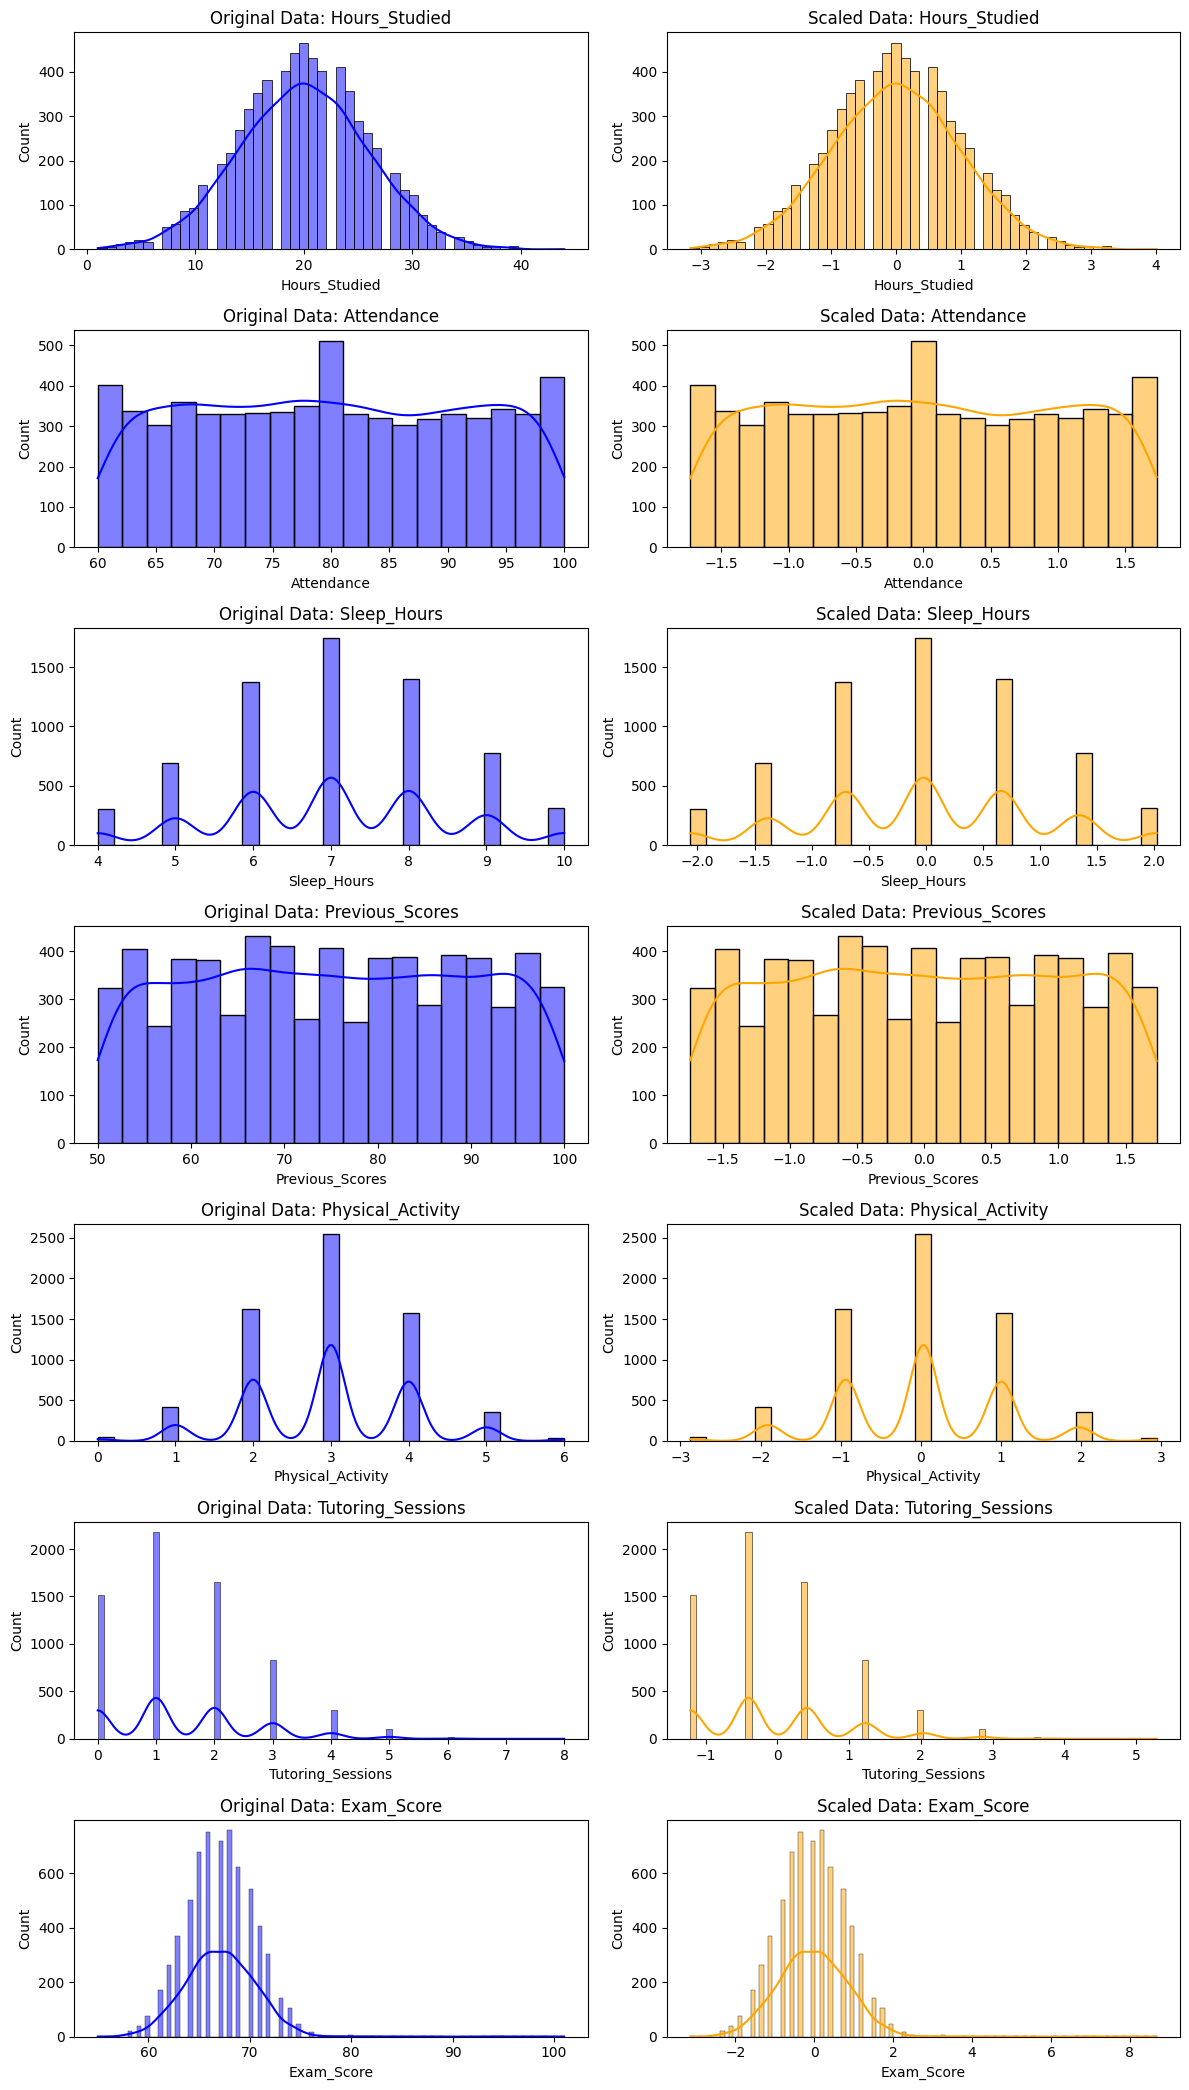

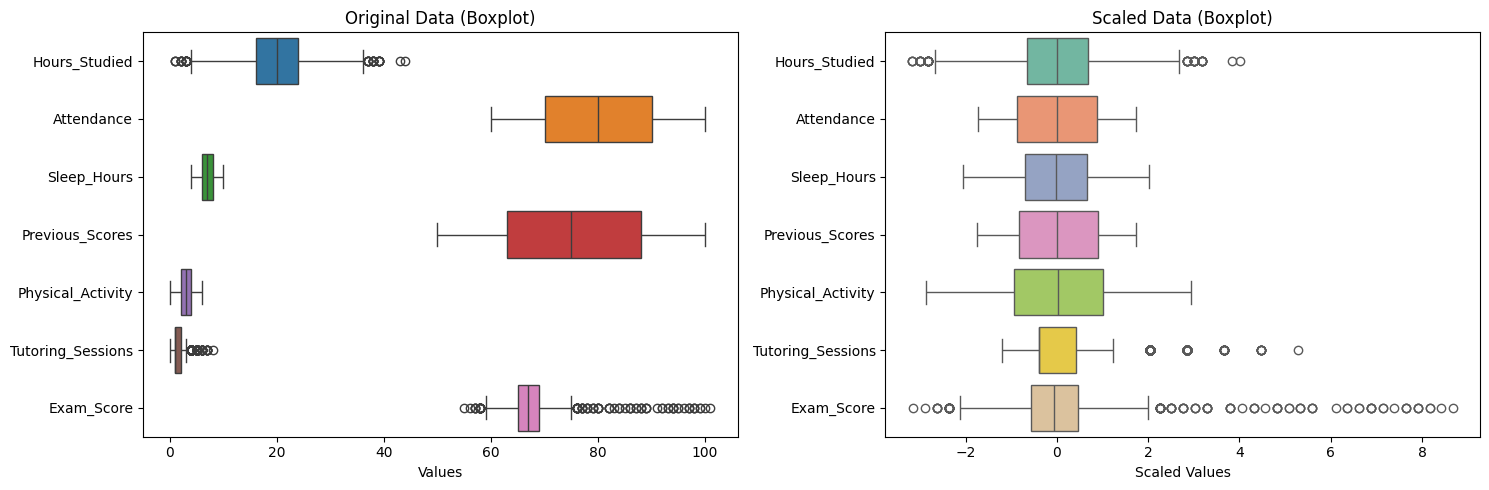

In [39]:
original_data = df[numerical_columns]

# 스케일링
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(original_data), columns=numerical_columns)

# 시각화 비교: 히스토그램
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, len(numerical_columns) * 3))

for i, col in enumerate(numerical_columns):
    # 원본 데이터 히스토그램
    sns.histplot(original_data[col], kde=True, ax=axes[i, 0], color='blue')
    axes[i, 0].set_title(f"Original Data: {col}")
    axes[i, 0].set_xlabel(col)

    # 스케일링된 데이터 히스토그램
    sns.histplot(scaled_data[col], kde=True, ax=axes[i, 1], color='orange')
    axes[i, 1].set_title(f"Scaled Data: {col}")
    axes[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()

# 시각화 비교: 박스플롯
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 원본 데이터 박스플롯
sns.boxplot(data=original_data, ax=axes[0], orient="h")
axes[0].set_title("Original Data (Boxplot)")
axes[0].set_xlabel("Values")

# 스케일링된 데이터 박스플롯
sns.boxplot(data=scaled_data, ax=axes[1], orient="h", palette="Set2")
axes[1].set_title("Scaled Data (Boxplot)")
axes[1].set_xlabel("Scaled Values")

plt.tight_layout()
plt.show()

In [40]:
# 전처리된 데이터를 합치기
preprocessed_data = pd.concat([scaled_data, encoded_categorical_data], axis=1)

print("\n전처리된 데이터 샘플:")
print(preprocessed_data.head())


전처리된 데이터 샘플:
   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  Physical_Activity  \
0       0.504942    0.348375    -0.019796        -0.143800           0.031411   
1      -0.162822   -1.383736     0.661399        -1.116110           1.001199   
2       0.671882    1.560853    -0.019796         1.106313           1.001199   
3       1.506587    0.781403     0.661399         1.592469           1.001199   
4      -0.162822    1.041220    -0.700990        -0.699406           1.001199   

   Tutoring_Sessions  Exam_Score  Parental_Involvement_High  \
0          -1.213934   -0.060578                        0.0   
1           0.411451   -1.602931                        0.0   
2           0.411451    1.738833                        0.0   
3          -0.401242    0.967657                        0.0   
4           1.224144    0.710598                        0.0   

   Parental_Involvement_Low  Parental_Involvement_Medium  ...  \
0                       1.0                          0.

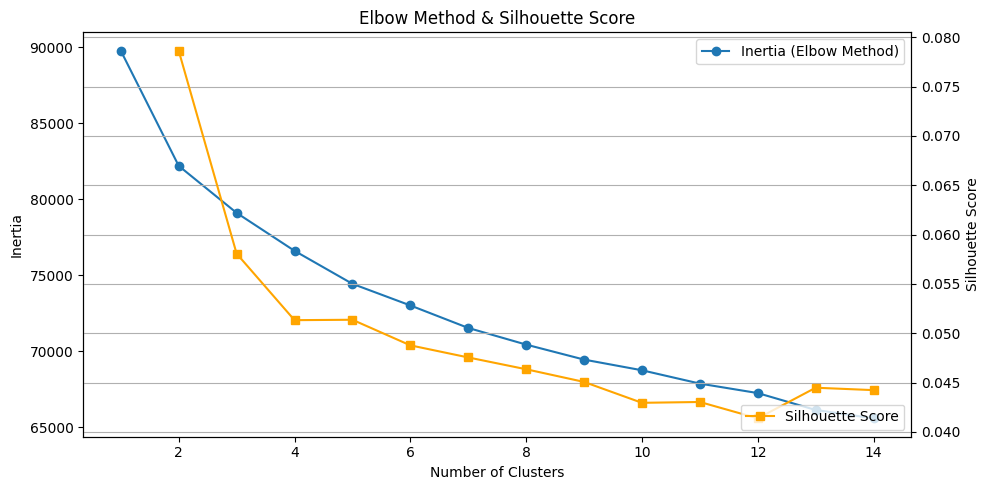

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 클러스터 개수 범위
cluster_range = range(1, 15)
inertia_values = []
silhouette_scores = []

# Elbow Method와 Silhouette Score 계산
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(preprocessed_data)
    inertia_values.append(kmeans.inertia_)  # 관성값(Inertia)

    if n_clusters > 1:  # Silhouette Score는 최소 2개 클러스터 필요
        score = silhouette_score(preprocessed_data, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(None)  # Silhouette Score는 클러스터가 1개일 경우 계산 불가

# 결과 시각화
fig, ax1 = plt.subplots(figsize=(10, 5))

# Elbow Method (Inertia)
ax1.plot(cluster_range, inertia_values, marker='o', label='Inertia (Elbow Method)')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method & Silhouette Score')
ax1.legend(loc='upper right')

# Silhouette Score
ax2 = ax1.twinx()  # 동일한 x축 공유
ax2.plot(cluster_range[1:], silhouette_scores[1:], marker='s', color='orange', label='Silhouette Score')
ax2.set_ylabel('Silhouette Score')
ax2.legend(loc='lower right')

plt.grid()
plt.tight_layout()
plt.show()


n=3: Silhouette Score = 0.058
n=4: Silhouette Score = 0.051
n=5: Silhouette Score = 0.051


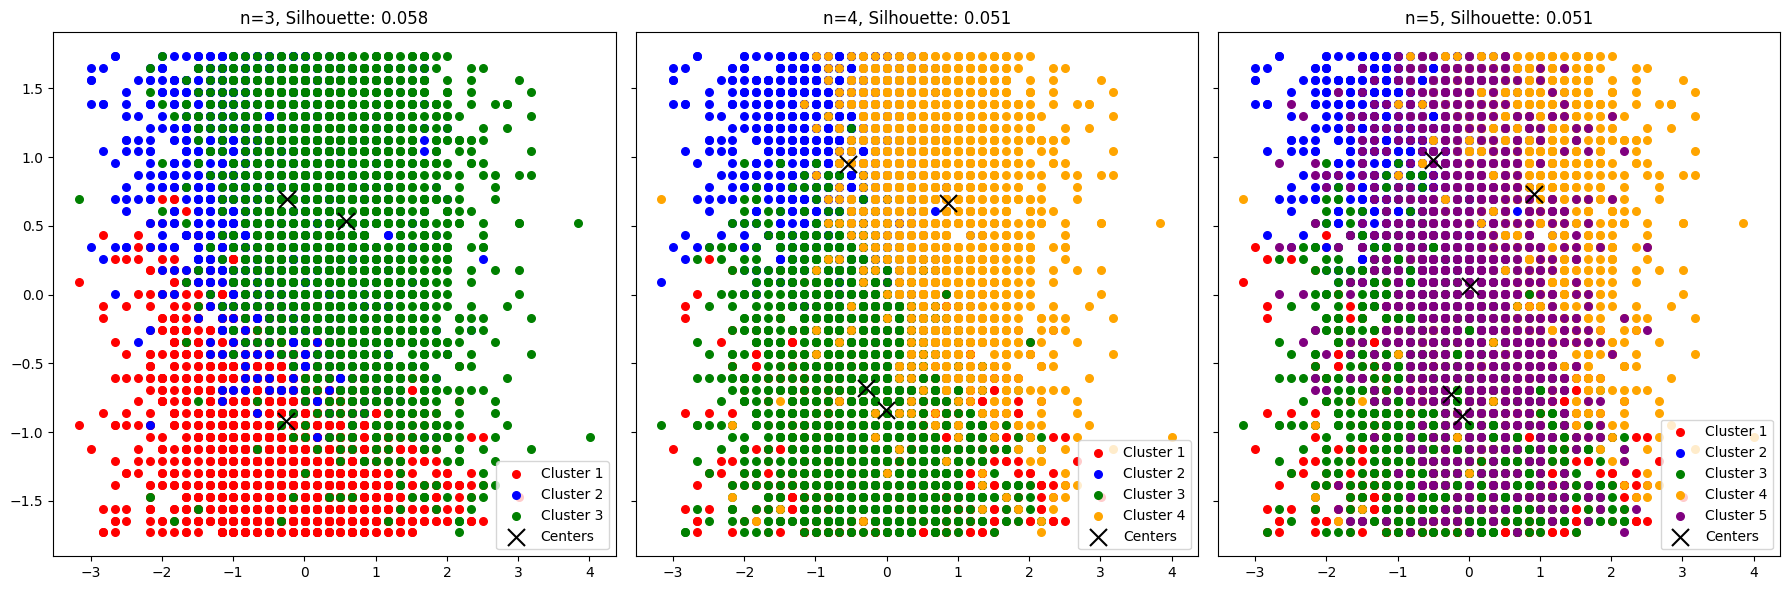

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# preprocessed_data가 Pandas DataFrame일 경우 Numpy 배열로 변환
if isinstance(preprocessed_data, pd.DataFrame):
    preprocessed_data = preprocessed_data.values  # Numpy 배열로 변환

# 클러스터 개수 설정
n_values = [3, 4, 5]  # n=3, n=4, n=5

# 클러스터링 수행 및 결과 저장
results = {}
for n in n_values:
    kmeans = KMeans(n_clusters=n, init='k-means++', random_state=42)  # 초기화 방식 설정
    labels = kmeans.fit_predict(preprocessed_data)
    silhouette = silhouette_score(preprocessed_data, labels)
    results[n] = {
        'labels': labels,
        'centers': kmeans.cluster_centers_,
        'silhouette': silhouette
    }

    print(f"n={n}: Silhouette Score = {silhouette:.3f}")

# 결과 시각화: n_values에 맞게 서브플롯 수 설정
fig, axes = plt.subplots(1, len(n_values), figsize=(18, 6), sharex=True, sharey=True)  # 서브플롯 수를 n_values 길이에 맞춤
colors = ['red', 'blue', 'green', 'orange', 'purple']

for idx, n in enumerate(n_values):
    ax = axes[idx]
    labels = results[n]['labels']
    centers = results[n]['centers']
    silhouette = results[n]['silhouette']

    # 데이터 포인트 시각화
    for cluster_idx in np.unique(labels):
        cluster_data = preprocessed_data[labels == cluster_idx]
        ax.scatter(cluster_data[:, 0], cluster_data[:, 1], s=30, color=colors[cluster_idx], label=f"Cluster {cluster_idx+1}")

    # 클러스터 중심 시각화
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=150, marker='x', label="Centers")

    ax.set_title(f"n={n}, Silhouette: {silhouette:.3f}")
    ax.legend()

plt.tight_layout()
plt.show()


n=3: Silhouette Score = 0.058
n=4: Silhouette Score = 0.051
n=5: Silhouette Score = 0.051


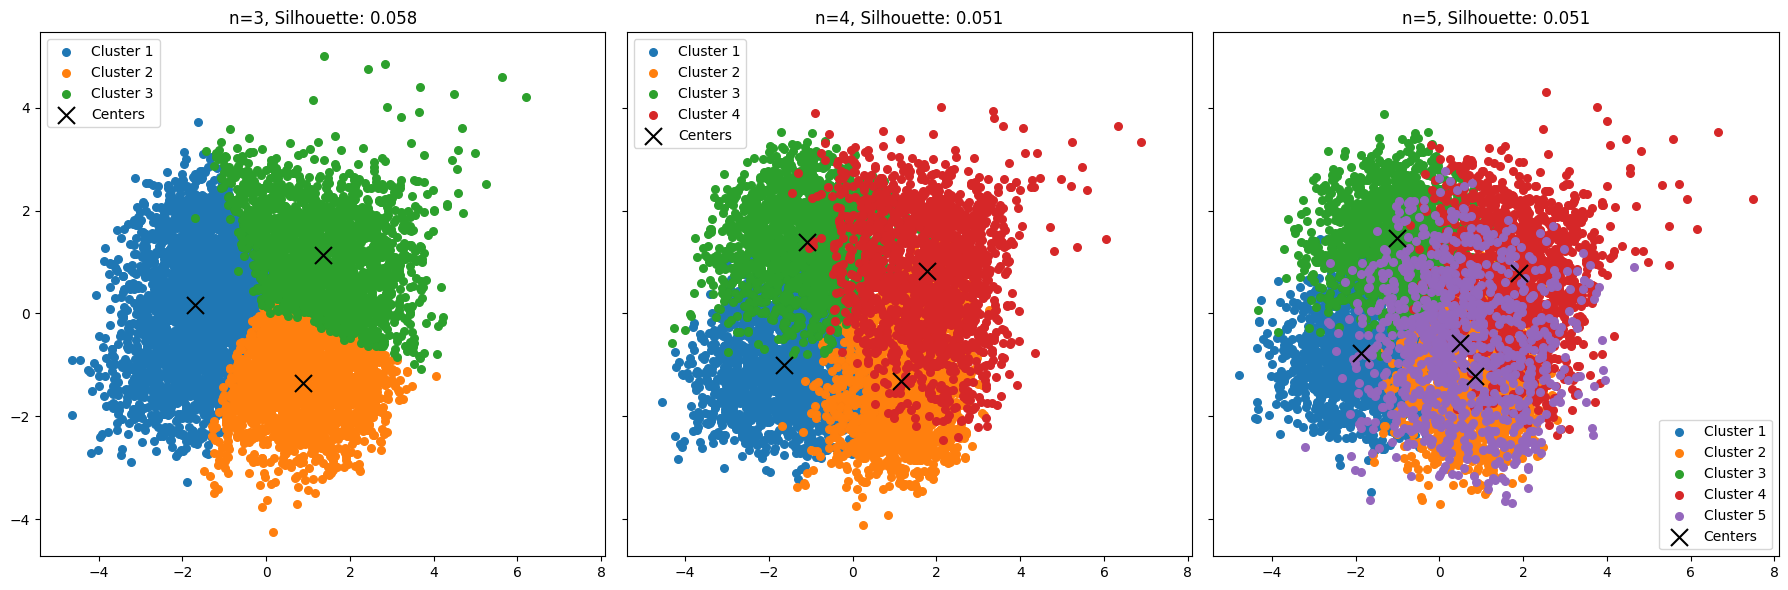

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# preprocessed_data가 Pandas DataFrame일 경우 Numpy 배열로 변환
if isinstance(preprocessed_data, pd.DataFrame):
    preprocessed_data = preprocessed_data.values  # Numpy 배열로 변환

# 클러스터 개수 설정
n_values = [3, 4, 5]  # n=3, n=4, n=5

# 클러스터링 수행 및 결과 저장
results = {}
for n in n_values:
    kmeans = KMeans(n_clusters=n, init='k-means++', random_state=42)  # 초기화 방식 설정
    labels = kmeans.fit_predict(preprocessed_data)
    silhouette = silhouette_score(preprocessed_data, labels)
    results[n] = {
        'labels': labels,
        'centers': kmeans.cluster_centers_,
        'silhouette': silhouette
    }

    print(f"n={n}: Silhouette Score = {silhouette:.3f}")

# LDA 차원 축소 및 시각화
fig, axes = plt.subplots(1, len(n_values), figsize=(18, 6), sharex=True, sharey=True)  # 서브플롯 수를 n_values 길이에 맞춤

for idx, n in enumerate(n_values):
    ax = axes[idx]
    labels = results[n]['labels']
    centers = results[n]['centers']
    silhouette = results[n]['silhouette']

    # LDA 차원 축소
    lda = LinearDiscriminantAnalysis(n_components=2)  # 2D로 축소
    transformed_data = lda.fit_transform(preprocessed_data, labels)

    # 데이터 포인트 시각화
    for cluster_idx in np.unique(labels):
        cluster_data = transformed_data[labels == cluster_idx]
        ax.scatter(cluster_data[:, 0], cluster_data[:, 1], s=30, label=f"Cluster {cluster_idx+1}")

    # 클러스터 중심 시각화
    transformed_centers = lda.transform(centers)  # LDA로 변환된 중심
    ax.scatter(transformed_centers[:, 0], transformed_centers[:, 1], c='black', s=150, marker='x', label="Centers")

    ax.set_title(f"n={n}, Silhouette: {silhouette:.3f}")
    ax.legend()

plt.tight_layout()
plt.show()


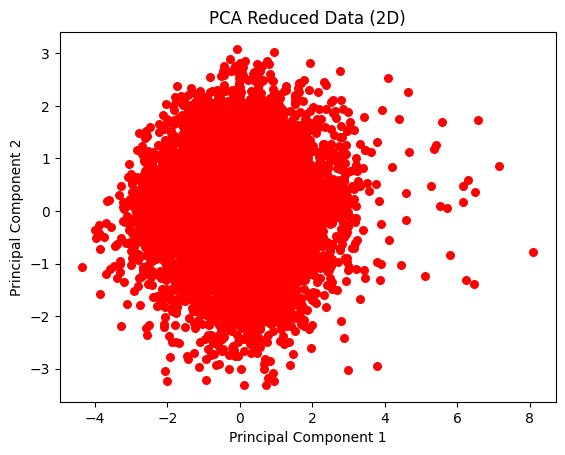

In [44]:
from sklearn.decomposition import PCA

# PCA로 데이터 축소 (2차원)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# 시각화
plt.scatter(pca_data[:, 0], pca_data[:, 1], s=30, c='red')
plt.title("PCA Reduced Data (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [56]:
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(preprocessed_data)
print(f"\nDBSCAN 클러스터링 레이블: {np.unique(dbscan_labels)}")


DBSCAN 클러스터링 레이블: [-1  0  1]


In [59]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

best_n = None
best_silhouette_score = -1  # 초기값을 낮게 설정
silhouette_scores_kmeans = []
silhouette_scores_dbscan = []

# KMeans 결과
for n in range(3, 6):  # n_clusters를 3에서 5까지 변경
    kmeans = KMeans(n_clusters=n, init='k-means++', random_state=42)  # init='k-means++'를 명시적으로 설정
    kmeans_labels = kmeans.fit_predict(preprocessed_data)

    # 실루엣 점수 계산 (클러스터가 2개 이상인 경우만)
    if len(np.unique(kmeans_labels)) > 1:
        silhouette_kmeans = silhouette_score(preprocessed_data, kmeans_labels)
        silhouette_scores_kmeans.append((n, silhouette_kmeans))
        print(f"KMeans - n={n}, Silhouette Score: {silhouette_kmeans:.3f}")

        # 최고 실루엣 점수와 n_clusters 갱신
        if silhouette_kmeans > best_silhouette_score:
            best_silhouette_score = silhouette_kmeans
            best_n = n
    else:
        print(f"KMeans - n={n}, 클러스터가 하나로만 형성되어 실루엣 점수를 계산할 수 없습니다.")

# DBSCAN 결과
eps_values = [2,2.5,3]  # eps 값을 여러 단계로 설정하여 다양한 밀도에서 테스트
min_samples_values = [3,4,5]  # min_samples 값을 여러 단계로 설정

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(preprocessed_data)

        # DBSCAN은 노이즈가 발생할 수 있기 때문에, -1 라벨을 제외하고 클러스터가 2개 이상인 경우에만 실루엣 점수 계산
        if len(np.unique(dbscan_labels[dbscan_labels != -1])) > 1:  # 노이즈 제외하고 클러스터가 2개 이상인 경우
            silhouette_dbscan = silhouette_score(preprocessed_data, dbscan_labels)
            silhouette_scores_dbscan.append((eps, min_samples, silhouette_dbscan))
            print(f"DBSCAN - eps={eps}, min_samples={min_samples}, Silhouette Score: {silhouette_dbscan:.3f}")

            # 최고 실루엣 점수와 파라미터 갱신
            if silhouette_dbscan > best_silhouette_score:
                best_silhouette_score = silhouette_dbscan
                best_n = (eps, min_samples)
        else:
            print(f"DBSCAN - eps={eps}, min_samples={min_samples}, 클러스터가 하나로만 형성되어 실루엣 점수를 계산할 수 없습니다.")

# 최고 실루엣 스코어 결과 출력
if best_n is not None:
    print(f"\n가장 높은 실루엣 스코어는 {best_n}에서 발생한 실루엣 점수: {best_silhouette_score:.3f}")
else:
    print("\n유효한 클러스터링 결과가 없습니다.")


KMeans - n=3, Silhouette Score: 0.058
KMeans - n=4, Silhouette Score: 0.051
KMeans - n=5, Silhouette Score: 0.051
DBSCAN - eps=2, min_samples=3, Silhouette Score: -0.281
DBSCAN - eps=2, min_samples=4, Silhouette Score: -0.238
DBSCAN - eps=2, min_samples=5, Silhouette Score: -0.139
DBSCAN - eps=2.5, min_samples=3, Silhouette Score: -0.255
DBSCAN - eps=2.5, min_samples=4, Silhouette Score: -0.247
DBSCAN - eps=2.5, min_samples=5, Silhouette Score: -0.226
DBSCAN - eps=3, min_samples=3, Silhouette Score: -0.058
DBSCAN - eps=3, min_samples=4, 클러스터가 하나로만 형성되어 실루엣 점수를 계산할 수 없습니다.
DBSCAN - eps=3, min_samples=5, 클러스터가 하나로만 형성되어 실루엣 점수를 계산할 수 없습니다.

가장 높은 실루엣 스코어는 3에서 발생한 실루엣 점수: 0.058


In [60]:
from sklearn.decomposition import PCA

# PCA로 차원 축소 (2차원)
pca = PCA(n_components=2)  # 2차원으로 축소
pca_data = pca.fit_transform(preprocessed_data)

# 축소된 데이터를 DataFrame으로 변환
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])

# PCA 결과 출력
print("PCA Variance Ratio:", pca.explained_variance_ratio_)
print(pca_df.head())

PCA Variance Ratio: [0.1307079  0.07734002]
       PCA1      PCA2
0  0.112664  0.601296
1 -2.157828 -0.168314
2  2.617109  0.039229
3  1.831102  1.605006
4  1.136610 -1.591707


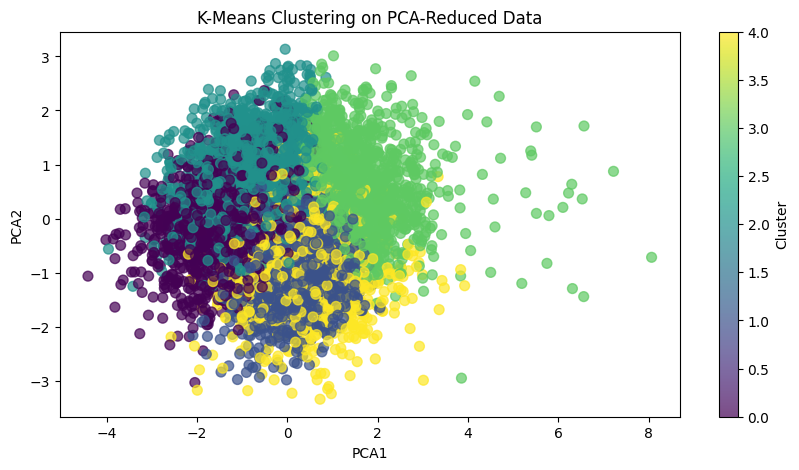

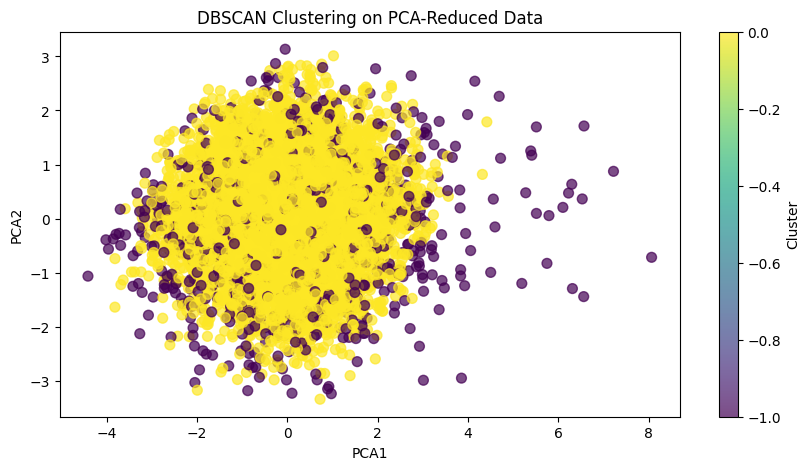

In [61]:
import matplotlib.pyplot as plt

# K-Means 클러스터링 결과 시각화
plt.figure(figsize=(10, 5))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)
plt.title("K-Means Clustering on PCA-Reduced Data")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label='Cluster')
plt.show()

# DBSCAN 클러스터링 결과 시각화
plt.figure(figsize=(10, 5))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=dbscan_labels, cmap='viridis', s=50, alpha=0.7)
plt.title("DBSCAN Clustering on PCA-Reduced Data")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label='Cluster')
plt.show()

In [62]:
# K-Means 클러스터링 (PCA 데이터 기반)
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(pca_data)

if len(np.unique(kmeans_pca_labels)) > 1:
    silhouette_kmeans_pca = silhouette_score(pca_data, kmeans_pca_labels)
    print(f"K-Means Silhouette Score (PCA): {silhouette_kmeans_pca:.3f}")
# DBSCAN 클러스터링 (PCA 데이터 기반)
dbscan_pca = DBSCAN(eps=0.5, min_samples=5)
dbscan_pca_labels = dbscan_pca.fit_predict(pca_data)

if len(np.unique(dbscan_pca_labels)) > 1:
    silhouette_dbscan_pca = silhouette_score(pca_data, dbscan_pca_labels)
    print(f"DBSCAN Silhouette Score (PCA): {silhouette_dbscan_pca:.3f}")

K-Means Silhouette Score (PCA): 0.330
DBSCAN Silhouette Score (PCA): 0.601


In [76]:
df['cluster_label_dbscan'] = dbscan_labels

# DBSCAN 클러스터별 수치형 특성 분석 (DBSCAN에서 노이즈 제외)
cluster_characteristics_dbscan = df[df['cluster_label_dbscan'] != -1].groupby('cluster_label_dbscan').agg({
    'Attendance': ['mean', 'std'],
    'Exam_Score': ['mean', 'std'],
    'Sleep_Hours': ['mean', 'std'],
    'Hours_Studied': ['mean', 'std']
    # 추가할 수 있는 수치형 컬럼들
}).reset_index()

print("DBSCAN 클러스터별 수치형 특성 분석:")
print(cluster_characteristics_dbscan)

# DBSCAN 클러스터별 문자형 특성 분석 (최빈값 사용)
cluster_characteristics_categorical_dbscan = df[df['cluster_label_dbscan'] != -1].groupby('cluster_label_dbscan').agg({
    'Attendance': lambda x: x.value_counts().idxmax(),
    'Parental_Involvement': lambda x: x.value_counts().idxmax(),
    'School_Type': lambda x: x.value_counts().idxmax(),
    'Hours_Studied': lambda x: x.value_counts().idxmax()
}).reset_index()

print("DBSCAN 클러스터별 문자형 특성 분석:")
print(cluster_characteristics_categorical_dbscan)

DBSCAN 클러스터별 수치형 특성 분석:
  cluster_label_dbscan Attendance           Exam_Score           Sleep_Hours  \
                             mean       std       mean       std        mean   
0                    0      88.25  6.964194  70.375000  1.505941    6.375000   
1                    1      66.50  3.209361  66.333333  1.366260    6.666667   

            Hours_Studied            
        std          mean       std  
0  0.916125     20.250000  2.314550  
1  0.816497     22.166667  4.262237  
DBSCAN 클러스터별 문자형 특성 분석:
   cluster_label_dbscan  Attendance Parental_Involvement School_Type  \
0                     0          95               Medium      Public   
1                     1          66               Medium      Public   

   Hours_Studied  
0             19  
1             24  


In [77]:
# 원본 데이터에서 클러스터 레이블을 추가하는 코드
original_data.loc[:, 'cluster_label_kmeans_pca'] = kmeans_pca_labels

# 수치형 특성 컬럼을 사용하여 분석 (원본 데이터에서 수치형 특성 사용)
numeric_columns = ['Hours_Studied' ,'Attendance', 'Exam_Score', 'Sleep_Hours']  # 수치형 특성 컬럼

# 클러스터별로 수치형 특성 분석
numeric_summary = original_data.groupby('cluster_label_kmeans_pca')[numeric_columns].agg(['mean', 'std'])

print("K-Means 클러스터별 수치형 특성 분석:")
print(numeric_summary)

K-Means 클러스터별 수치형 특성 분석:
                         Hours_Studied           Attendance            \
                                  mean       std       mean       std   
cluster_label_kmeans_pca                                                
0                            15.539237  4.757669  74.266988  9.577670   
1                            23.391856  4.812277  73.259122  7.992425   
2                            21.477618  5.333478  90.544148  7.003286   

                         Exam_Score           Sleep_Hours            
                               mean       std        mean       std  
cluster_label_kmeans_pca                                             
0                         64.003507  2.152107    6.993862  1.473139  
1                         66.913802  2.155214    7.235854  1.460015  
2                         70.513347  3.537701    6.901437  1.452952  


In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, silhouette_score


file_path = 'StudentPerformanceFactors.csv'  


df = pd.read_csv(file_path)
data = pd.read_csv(file_path)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


시험 성적을 바 그래프로 나타내어 보았다. 보편적으로 60-70점 대의 학생이 많은걸 알 수 있었다. 

100점 이후에 있는 점수는 이상치로 판단하여 추후 제거 


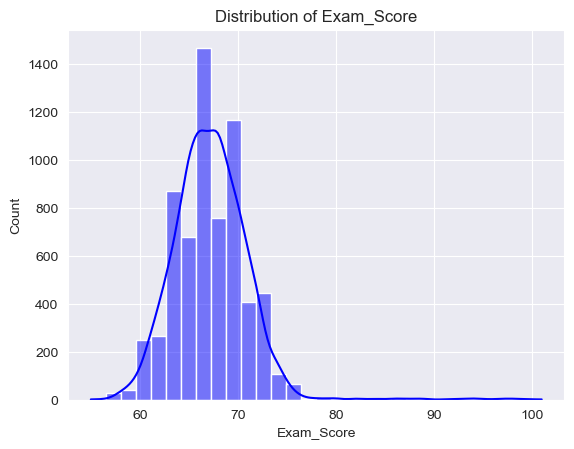

In [5]:
sns.histplot(df['Exam_Score'], kde=True, bins=30, color='blue')
plt.title("Distribution of Exam_Score")
plt.show()


부모의 교육참여 정도와 시험 성적 비교 / 각 낮음, 중간, 높음 중 하나로 모든 케이스에서 이상치가 있는걸로 보아 변칙적인 존재가 있음을 알 수 있다.


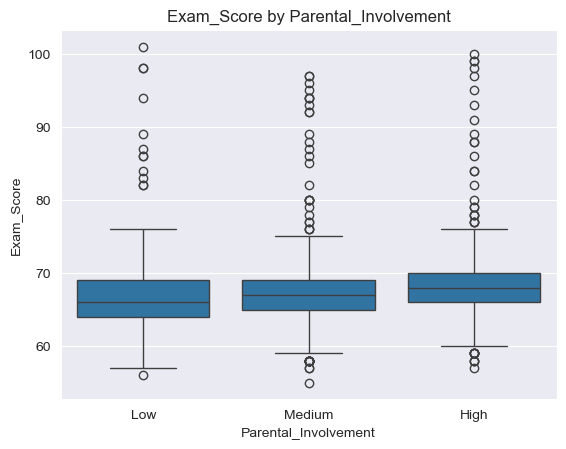

In [6]:
sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=df) # 부모의 교육참여 정도와 시험 성적 비교
plt.title("Exam_Score by Parental_Involvement")
plt.show()


일주일에 공부한 시간을 나타내는 "Hours_Studied"와 성적을 비교해 보았다. 전반적으로 공부시간이 성적을 대변하지만 그렇지 않은 경우도 있음을 알 수 있다.

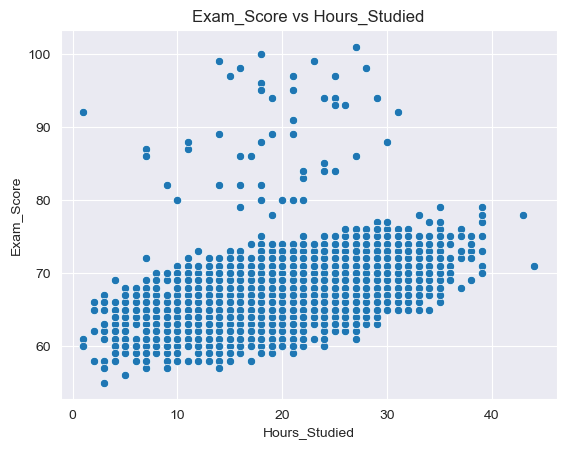

In [7]:
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title("Exam_Score vs Hours_Studied")
plt.show()


결측치 탐색결과 Teacher_Quality, Parental_Education_Level, Distance_from_Home에서 결측치를 발견하였다.

해당 결측치의 row를 제거하기에는 원본 데이터 셋이 6600개로 적은편 이라서 평균, 최빈값으로 대치할 예정,

Teacher_Quality와 같은 경우 선생님의 능력을 대치하는건 부적합 하다고 판단되어 row삭제, 나머지는 대치하는걸로 예정


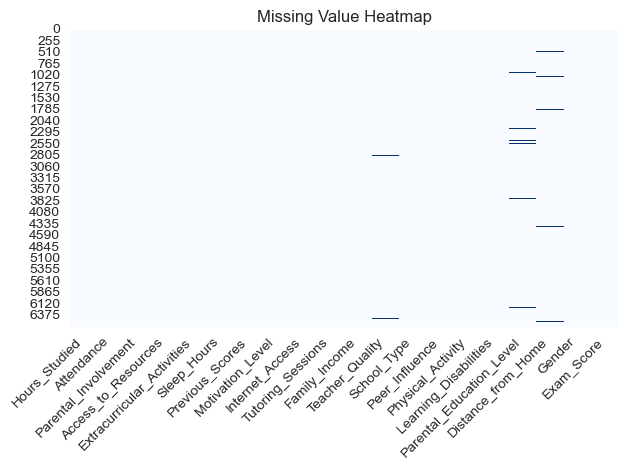

In [8]:
sns.heatmap(df.isnull(), cbar=False, cmap="Blues")  
plt.title("Missing Value Heatmap")
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

각 결측치의 차이 

확인결과 세가지의 결측치는 모두 범주형 데이터이다. 따라서 최빈값으로 대치할 것이다. (row 삭제와 대치의 비교 실험설계)


In [9]:

missing_counts = df[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']].isnull().sum()
print("결측치 갯수:")
print(missing_counts)


결측치 갯수:
Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64


In [10]:
# 각 컬럼의 최빈값 확인
mode_teacher_quality = df['Teacher_Quality'].mode()[0]
mode_parental_education = df['Parental_Education_Level'].mode()[0]
mode_distance_from_home = df['Distance_from_Home'].mode()[0]

print(f"Teacher_Quality 최빈값: {mode_teacher_quality}")
print(f"Parental_Education_Level 최빈값: {mode_parental_education}")
print(f"Distance_from_Home 최빈값: {mode_distance_from_home}")

# 결측치 대치
df['Teacher_Quality'] = df['Teacher_Quality'].fillna(mode_teacher_quality)
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna(mode_parental_education)
df['Distance_from_Home'] = df['Distance_from_Home'].fillna(mode_distance_from_home)

# 결과 확인
print("\n결측치 대치 후 각 컬럼의 결측치 갯수:")
print(df[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']].isnull().sum())



Teacher_Quality 최빈값: Medium
Parental_Education_Level 최빈값: High School
Distance_from_Home 최빈값: Near

결측치 대치 후 각 컬럼의 결측치 갯수:
Teacher_Quality             0
Parental_Education_Level    0
Distance_from_Home          0
dtype: int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

이상치 제거 / 범주형 인코딩(label, one-hot)

발견한 이상치는
 
Hours_Studied에서 발견된 이상치 개수: 43

Tutoring_Sessions에서 발견된 이상치 개수: 430

Exam_Score에서 발견된 이상치 개수: 104

공부 시즌, 공부량, 시험의 이상치를 제거하는 것은 모델이 평균적인 학생을 맞추는데에 정확성을 높일 수 있지만 이상치인 경우가 전체의 1/10을 차지할 정도로 많아서 이상치로 보기보다 해당 값들의 다른이유(ex. 부모의 성적(유전), 학교와의 거리, 활동시간 등)과의 비교를 위해 대체하지 않고 진행 


In [12]:
# 이상치 탐지 함수
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # 1사분위수
    Q3 = data[column].quantile(0.75)  # 3사분위수
    IQR = Q3 - Q1  # IQR 계산
    lower_bound = Q1 - 1.5 * IQR  # 하한선
    upper_bound = Q3 + 1.5 * IQR  # 상한선

    print(f"{column}의 IQR: {IQR:.2f}, 하한선: {lower_bound:.2f}, 상한선: {upper_bound:.2f}")
    
    # 이상치 감지
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"{column}에서 발견된 이상치 개수: {len(outliers)}")
    
    return outliers

# 수치형 데이터 이상치 탐지
numerical_columns = df.select_dtypes(include='int64').columns  # 수치형 컬럼만 선택
for col in numerical_columns:
    print("\n" + "="*40)
    outliers = detect_outliers_iqr(df, col)



Hours_Studied의 IQR: 8.00, 하한선: 4.00, 상한선: 36.00
Hours_Studied에서 발견된 이상치 개수: 43

Attendance의 IQR: 20.00, 하한선: 40.00, 상한선: 120.00
Attendance에서 발견된 이상치 개수: 0

Sleep_Hours의 IQR: 2.00, 하한선: 3.00, 상한선: 11.00
Sleep_Hours에서 발견된 이상치 개수: 0

Previous_Scores의 IQR: 25.00, 하한선: 25.50, 상한선: 125.50
Previous_Scores에서 발견된 이상치 개수: 0

Tutoring_Sessions의 IQR: 1.00, 하한선: -0.50, 상한선: 3.50
Tutoring_Sessions에서 발견된 이상치 개수: 430

Physical_Activity의 IQR: 2.00, 하한선: -1.00, 상한선: 7.00
Physical_Activity에서 발견된 이상치 개수: 0

Exam_Score의 IQR: 4.00, 하한선: 59.00, 상한선: 75.00
Exam_Score에서 발견된 이상치 개수: 104


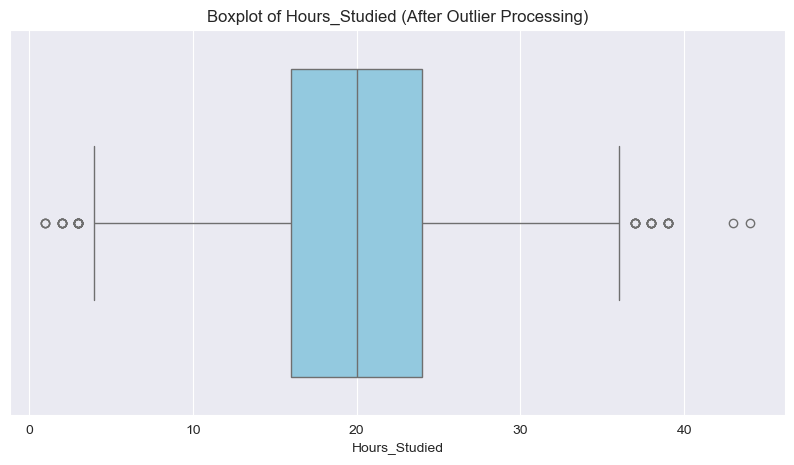

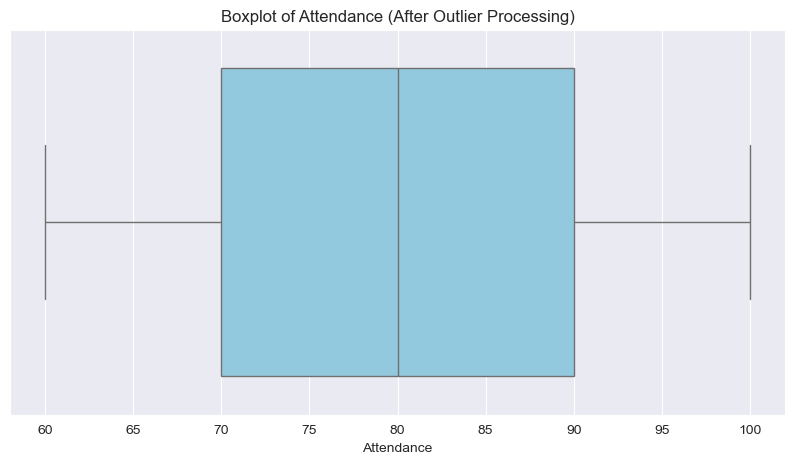

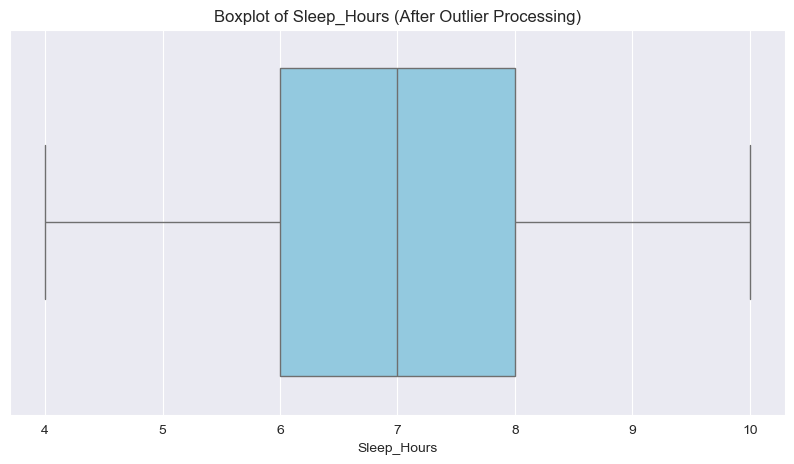

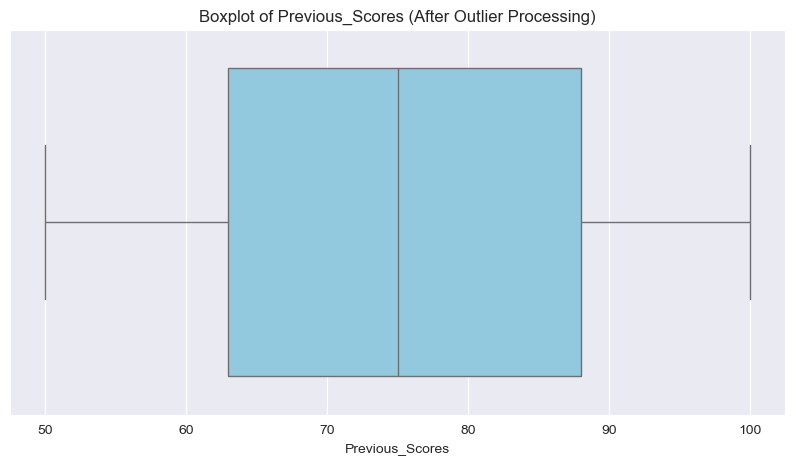

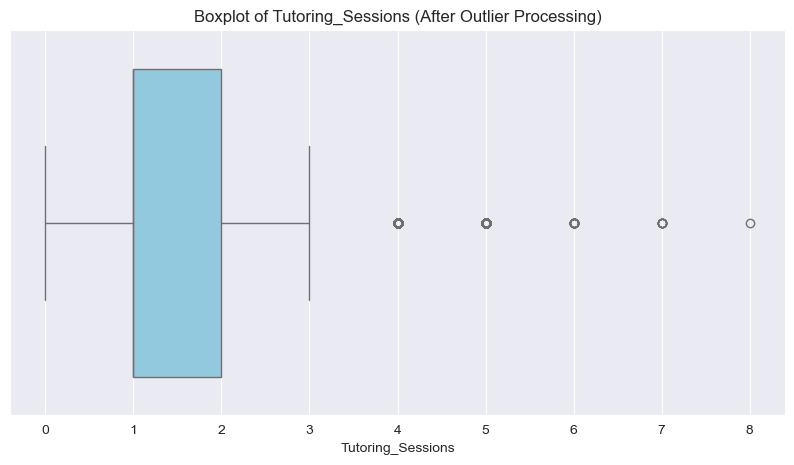

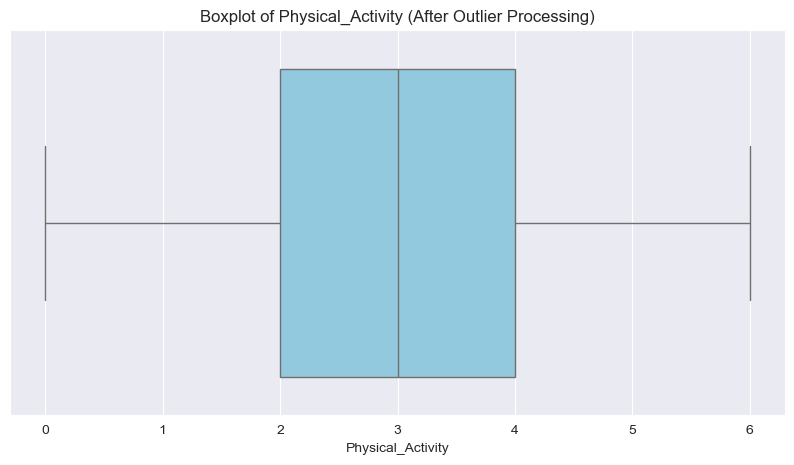

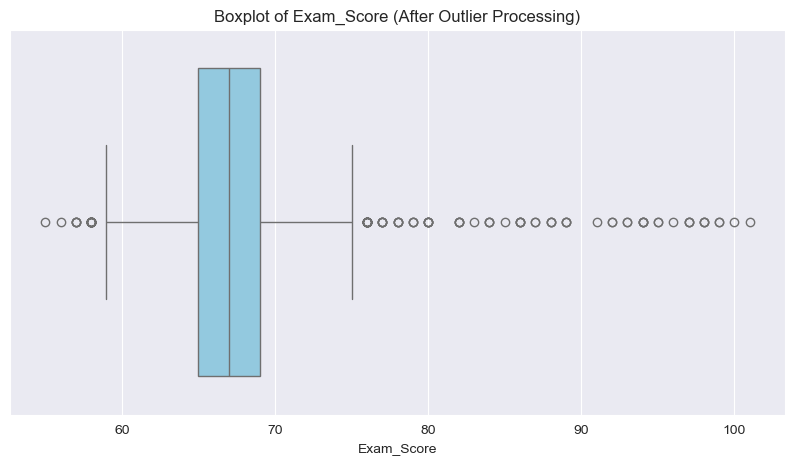

In [13]:

for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=col, color="skyblue")
    plt.title(f"Boxplot of {col} (After Outlier Processing)")
    plt.show()


범주형 데이터 원핫인코딩 / 3개 이상 {학력(고졸,대졸,대학원), 집과의 거리}은 labeling 인코딩

In [14]:
# 범주형 데이터만 추출
categorical_columns = df.select_dtypes(include='object').columns
categorical_df = df[categorical_columns]
categorical_df.head(10)


,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,Low,High,No,Low,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
1,Low,Medium,No,Low,Yes,Medium,Medium,Public,Negative,No,College,Moderate,Female
2,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male
3,Low,Medium,Yes,Medium,Yes,Medium,Medium,Public,Negative,No,High School,Moderate,Male
4,Medium,Medium,Yes,Medium,Yes,Medium,High,Public,Neutral,No,College,Near,Female
5,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Positive,No,Postgraduate,Near,Male
6,Medium,Low,Yes,Low,Yes,Low,Medium,Private,Neutral,No,High School,Moderate,Male
7,Low,High,Yes,Medium,Yes,High,High,Public,Negative,No,High School,Far,Male
8,Medium,High,No,High,Yes,Medium,Low,Private,Neutral,No,College,Near,Male
9,Medium,Medium,Yes,Medium,Yes,High,High,Public,Positive,No,High School,Moderate,Male


In [15]:
categorical_df.columns

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')

In [16]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding을 적용할 열 # School_Type 이건 공립 사립을 뜯하는것 같다
label_cols = ["Parental_Involvement", "Access_to_Resources", "Motivation_Level", "Family_Income", "Teacher_Quality","Distance_from_Home","Peer_Influence","Parental_Education_Level","School_Type"]

# One-Hot Encoding을 적용할 열 
one_hot_cols = ["Extracurricular_Activities", "Internet_Access", "Learning_Disabilities", "Gender"]

# Label Encoding 적용
label_encoder = LabelEncoder()
for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])

# One-Hot Encoding 적용
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)


다중 공선형성을 피하기 위해 원핫중 하나 지우기도 포함


scaling : 범주형 데이터는 모두 인코딩 하였음으로 나머지 정수형(int 64)은 스케일링 

In [17]:
arr = ['Hours_Studied', 'Attendance', 
        'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity']

# 해당 열들만 추출
df_selected = df[arr]



In [18]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# Min-Max 스케일링 적용
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns)

df_combined = pd.concat([df.drop(columns=df_selected.columns), df_scaled], axis=1)


In [19]:

df_combined.head()

,Parental_Involvement,Access_to_Resources,Motivation_Level,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Parental_Education_Level,Distance_from_Home,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,Learning_Disabilities_Yes,Gender_Male,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity
0,1,0,1,1,2,1,2,1,2,67,False,True,False,True,0.511628,0.600,0.500000,0.46,0.000,0.500000
1,1,2,1,2,2,1,0,0,1,61,False,True,False,False,0.418605,0.100,0.666667,0.18,0.250,0.666667
2,2,2,2,2,2,1,1,2,2,74,True,True,False,True,0.534884,0.950,0.500000,0.82,0.250,0.666667
3,1,2,2,2,2,1,0,1,1,71,True,True,False,True,0.651163,0.725,0.666667,0.96,0.125,0.666667
4,2,2,2,2,0,1,1,0,2,70,True,True,False,False,0.418605,0.800,0.333333,0.30,0.375,0.666667


train test split / 모델 생성, 1차 확인

In [20]:
from sklearn.model_selection import train_test_split

y = df_combined['Exam_Score']
X = df_combined.drop(columns=['Exam_Score'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

RMSE 는 총 100점중 오차를 의미한다. 시드 42 에서는 +-5.2정도 큰차이를 보이지만, k-fold로 10번 돌린 평균은 2.3 정도이다. 

RandomForestRegressor 방식 사용

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 모델 생성 및 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
print("RMSE on Test Set:", rmse)


RMSE on Test Set: 5.295897655068079


In [22]:
from sklearn.model_selection import cross_val_score

# 교차 검증 점수 계산
cv_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
print("Cross-Validation RMSE:", (-cv_scores.mean())**0.5)


Cross-Validation RMSE: 2.3633670137645426


특성의 중요도를 파악하였다.

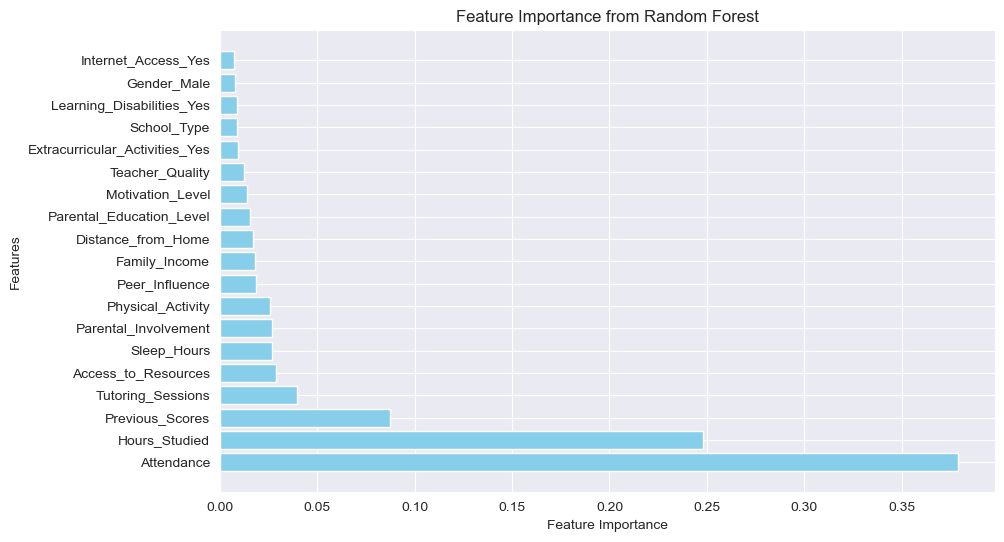

In [23]:
# 특성의 중요도 확인
import matplotlib.pyplot as plt
import pandas as pd

# 특성 중요도 추출 및 시각화
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.show()

지금까지 전처리한 데이터의 상관 관계를 분석해 보았다. 출석과 공부시간은 시험 점수에 강한 상관관계가 있었다. 3등으로는 이전 점수, 4등으로는 과외가 의미 있다고 나온다,

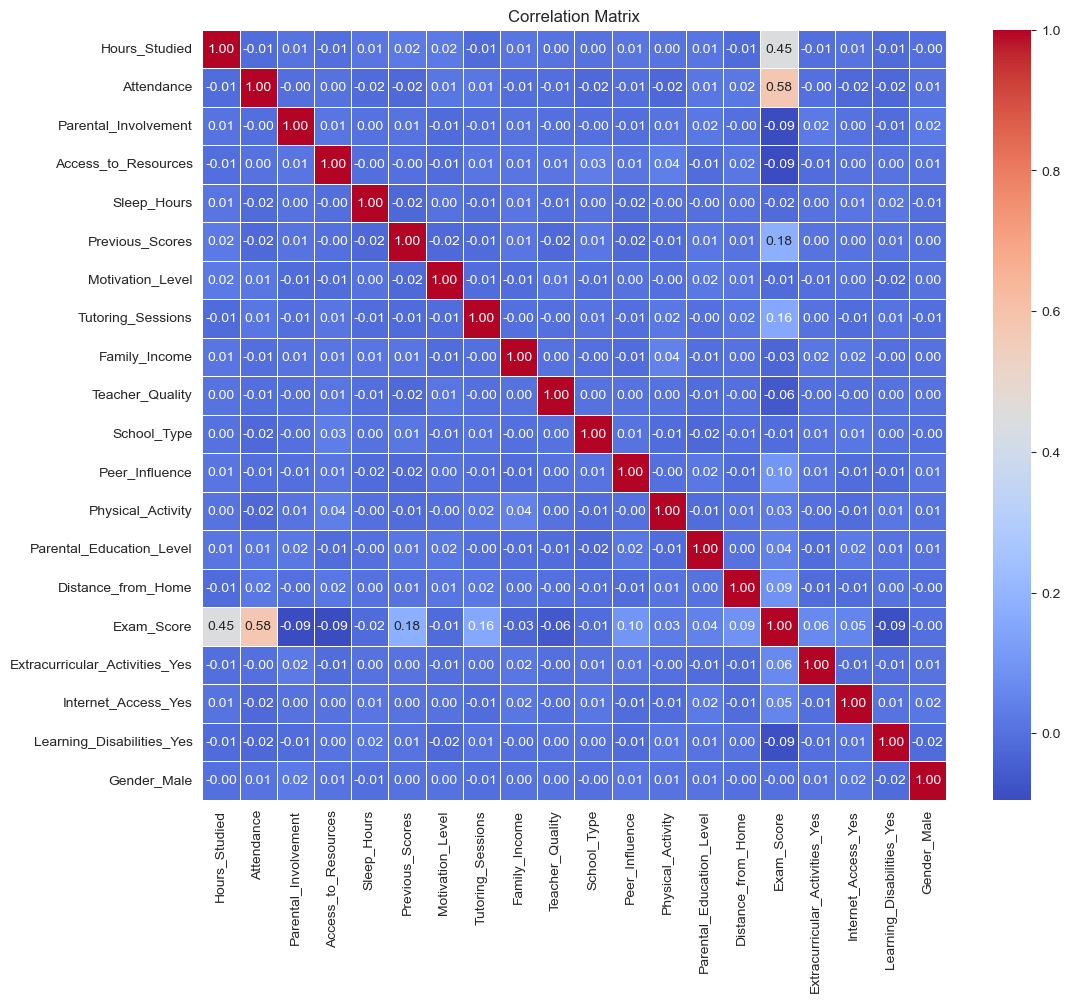

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상관행렬 계산 (숫자형 데이터만 포함)
correlation_matrix = df.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


xgboost를 사용하여 상관관계/ RMSE 분석 

[0]	test-rmse:3.61552
[1]	test-rmse:3.43643
[2]	test-rmse:3.27610
[3]	test-rmse:3.14086
[4]	test-rmse:3.02495
[5]	test-rmse:2.92495
[6]	test-rmse:2.83665
[7]	test-rmse:2.76619
[8]	test-rmse:2.70068
[9]	test-rmse:2.64728
[10]	test-rmse:2.60211
[11]	test-rmse:2.56111
[12]	test-rmse:2.52217
[13]	test-rmse:2.48839
[14]	test-rmse:2.45854
[15]	test-rmse:2.43387
[16]	test-rmse:2.41011
[17]	test-rmse:2.38997
[18]	test-rmse:2.37243
[19]	test-rmse:2.35347
[20]	test-rmse:2.33791
[21]	test-rmse:2.32358
[22]	test-rmse:2.31242
[23]	test-rmse:2.30066
[24]	test-rmse:2.29411
[25]	test-rmse:2.28511
[26]	test-rmse:2.27735
[27]	test-rmse:2.26761
[28]	test-rmse:2.25981
[29]	test-rmse:2.25251
[30]	test-rmse:2.24580
[31]	test-rmse:2.23687
[32]	test-rmse:2.23070
[33]	test-rmse:2.22495
[34]	test-rmse:2.21891
[35]	test-rmse:2.21226
[36]	test-rmse:2.20942
[37]	test-rmse:2.20432
[38]	test-rmse:2.20166
[39]	test-rmse:2.19728
[40]	test-rmse:2.19332
[41]	test-rmse:2.18922
[42]	test-rmse:2.18504
[43]	test-rmse:2.1835

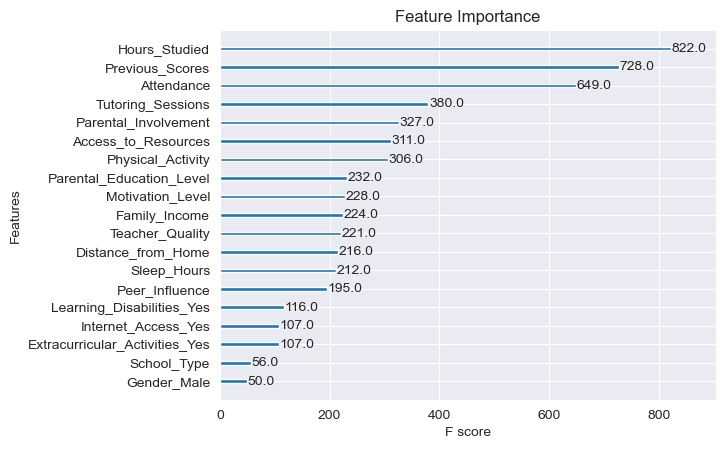

In [25]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np


# XGBoost DMatrix 생성
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# XGBoost 모델 설정
params = {
    'objective': 'reg:squarederror',  # 회귀 문제 설정
    'eval_metric': 'rmse',           # 평가 지표로 RMSE 사용
    'max_depth': 6,                  # 트리 깊이
    'eta': 0.1,                      # 학습률
    'seed': 42                       # 랜덤 시드
}

# 모델 학습
model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtest, 'test')], early_stopping_rounds=10)

# 예측
y_pred = model.predict(dtest)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on Test Set: {rmse:.4f}")

# 중요 피처 확인
xgb.plot_importance(model, importance_type='weight')
plt.title("Feature Importance")
plt.show()


그리드 서치로 최고의 파라미터 뽑기

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10],
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


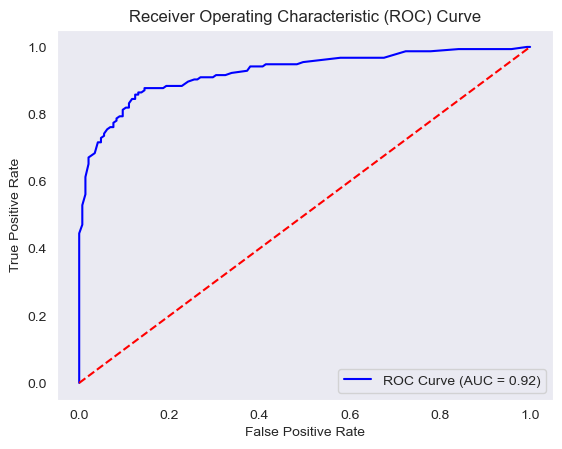

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 샘플 데이터 생성
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest 분류기 훈련
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train, y_train)

# 예측 확률 계산
y_pred_prob = clf.predict_proba(X_test)

# ROC Curve 및 AUC 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# ROC 곡선 시각화
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# y_test: 실제 값 (0 또는 1)
# y_pred_prob: 모델의 예측 확률 (e.g., Random Forest 또는 Logistic Regression의 predict_proba)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])  # 양성 클래스 확률 사용
roc_auc = auc(fpr, tpr)

print("AUC Score:", roc_auc)


AUC Score: 0.9244493882091211


엘보우 방식을 사용하여 최적의 클러스트링 갯수를 분류 (거의 1직선이므로 그나마 기울기가 큰 3-4 정도로 예상됨

C:\anaconda3\envs\conda\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\anaconda3\envs\conda\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\anaconda3\envs\conda\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\anaconda3\envs\conda\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\anaconda3\envs\conda\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


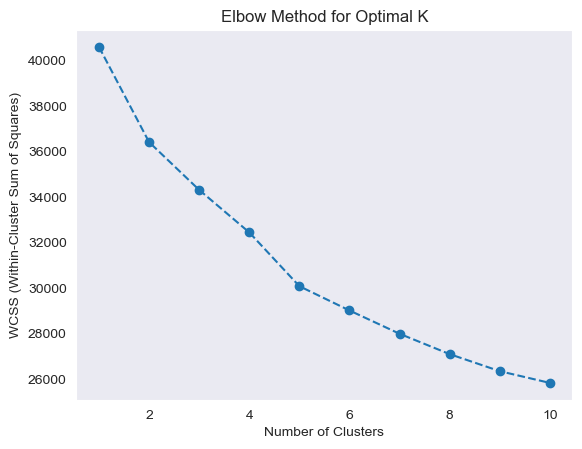

In [31]:
# Feature 데이터 준비
X = df_combined.drop(columns=['Exam_Score'])  # Exam_Score는 Target이라 제거

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 클러스터 수에 따른 관성값(WCSS) 계산
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# 결과 시각화
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid()
plt.show()


In [32]:
from sklearn.metrics import silhouette_score

# 실루엣 점수 계산
sil_score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {sil_score:.2f}")


Silhouette Score: 0.09


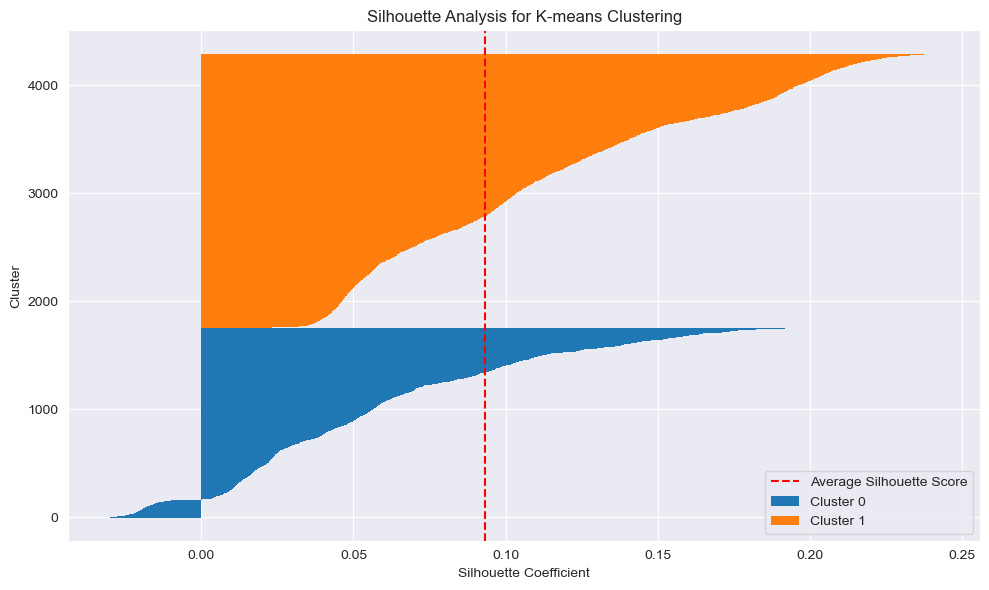

In [41]:
from sklearn.metrics import silhouette_samples
import numpy as np

# 각 데이터 포인트의 실루엣 점수 계산
silhouette_vals = silhouette_samples(X, kmeans.labels_)

# 클러스터별 실루엣 점수 시각화
fig, ax = plt.subplots(figsize=(10, 6))
y_lower, y_upper = 0, 0
for i in range(2):  # 각 클러스터에 대해
    cluster_silhouette_vals = silhouette_vals[kmeans.labels_ == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax.barh(
        range(y_lower, y_upper),
        cluster_silhouette_vals,
        height=1.0,
        edgecolor='none',
        label=f'Cluster {i}',
    )
    y_lower += len(cluster_silhouette_vals)

# 전체 평균 실루엣 점수 표시
ax.axvline(sil_score, color="red", linestyle="--", label="Average Silhouette Score")
ax.set_xlabel("Silhouette Coefficient")
ax.set_ylabel("Cluster")
ax.set_title("Silhouette Analysis for K-means Clustering")
ax.legend()
plt.tight_layout()
plt.show()


실루엣 스코어는 0.105으로 상당히 낮은 편이다. 실루엣의 결과로는 2개의 클러스트로 분류하는것이 가장 적합하다고 한다.

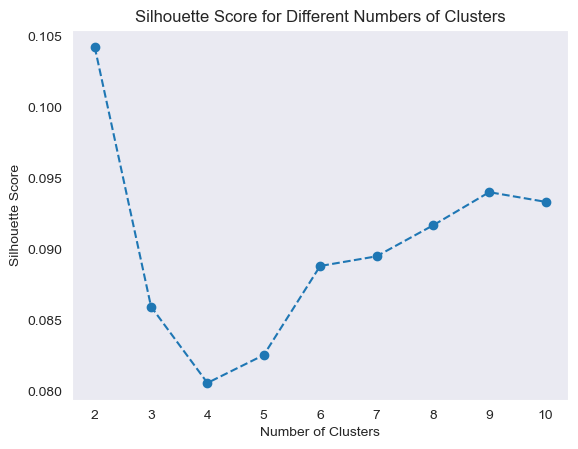

In [35]:
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# 시각화
plt.plot(range(2, 11), silhouette_scores, marker="o", linestyle="--")
plt.title("Silhouette Score for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()


In [36]:
# 최적의 클러스터 수 설정 (예: k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# 클러스터 레이블 추가
df_combined['Cluster_Label'] = kmeans.labels_


In [37]:
print(df_combined['Cluster_Label'].value_counts())


Cluster_Label
1    2535
2    2314
0    1758
Name: count, dtype: int64


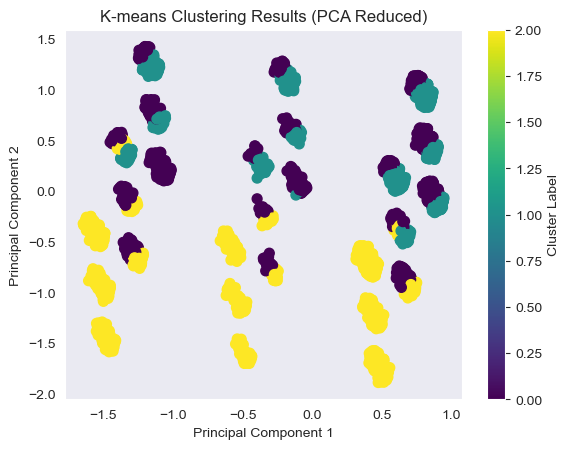

In [39]:
from sklearn.decomposition import PCA

# PCA로 2차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.title('K-means Clustering Results (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()


In [40]:
# 점수를 20%씩 나누어 등급화
data['Grade'] = pd.qcut(data['Exam_Score'], q=5, labels=['E', 'D', 'C', 'B', 'A'])

# 등급별 데이터 분포 확인
print(data['Grade'].value_counts())

Grade
C    1476
E    1452
D    1430
B    1166
A    1083
Name: count, dtype: int64
